In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 선형 회귀

### 1-1. 정규방정식

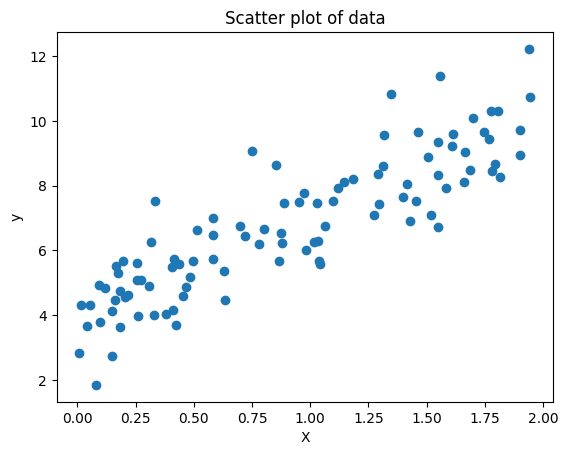

In [3]:
# 임의의 선형(처럼 보이는) 데이터 생성
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# 데이터 시각화
plt.scatter(X, y)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Scatter plot of data')
plt.show()

In [4]:
# 정규방정식을 사용한 해석학적 계산 방법
X_b = np.c_[np.ones((100, 1)), X]    # 모든 샘플에 x0 = 1을 추가
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)    # inv(): 역행렬 계산
theta_best

array([[3.93540096],
       [3.13364664]])

> 데이터를 생성하기 위해 사용한 함수는 `y = 4 + 3x + 가우시안잡음'이며, 정규방정식을 통해 계산한 값은 이와 비슷한 파라미터를 재현하였다.

In [5]:
# 임의의 값에 대한 예측
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]    # 모든 샘플에 x0 = 1을 추가(행렬 연산에서 상수항을 계산하기 위한 목적)
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.93540096],
       [10.20269424]])

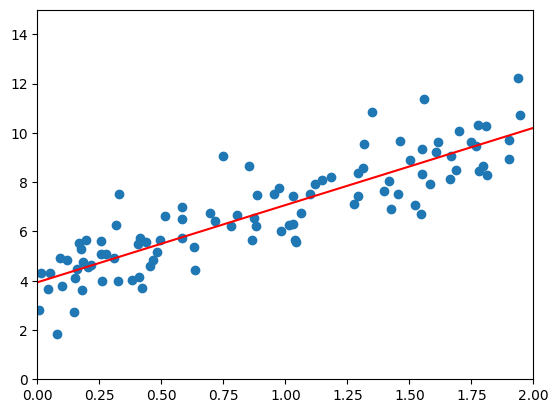

In [6]:
# 예측 모델 시각화
plt.plot(X_new, y_predict, 'r-')
plt.scatter(X, y)
plt.axis([0, 2, 0, 15])
plt.show()

In [7]:
# 사이킷런을 사용한 선형 회귀
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
print(lin_reg.intercept_, lin_reg.coef_)    # 가중치, 편향 확인
lin_reg.predict(X_new)

[3.93540096] [[3.13364664]]


array([[ 3.93540096],
       [10.20269424]])

> LinearRegression 클래스는 `scipy.linalg.lstsq()` 함수를 기반으로 하므로 직접 호출할 수도 있다.
> - scipy.linalg.lstsq() 함수는 $\hat{\theta}=\rm{X^+y}$을 계산한다.
> - 이때 $\rm{X^+}$는 `유사역행렬(pseudoinverse)`이며, 이는 `np.linalg.pinv()` 함수를 사용하여 직접 구할 수도 있다.

In [8]:
# scipy를 사용한 최적의 가중치 및 편향 계산
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)    # lstsq(): 최소자승법
theta_best_svd

array([[3.93540096],
       [3.13364664]])

In [9]:
# 유사역행렬 확인
np.linalg.pinv(X_b).dot(y)

array([[3.93540096],
       [3.13364664]])

# 2. 경사하강법

In [10]:
# 배치경사하강법 알고리즘 구현
eta = 0.1              # 학습률
n_iterations = 1000    # 반복 횟수
m = 100                # 샘플 수

theta = np.random.randn(2, 1)    # 무작위 초기화

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)   # 비용함수의 편도함수
    theta = theta - eta * gradients   # 경사하강법 스텝

print(theta)

[[3.93540096]
 [3.13364664]]


In [11]:
# 확률적 경사하강법 알고리즘 구현
n_epochs = 50
t0, t1 = 5, 50    # 학습 스케줄 하이퍼파라미터

def learning_schedule(t):   # 학습 스케줄 함수: 매 반복에서 학습률을 결정하는 함수 -> 학습률을 점진적으로 감소시킴(지역 최솟값을 어느정도 방지)
    return t0 / (t + t1)

theta = np.random.randn(2, 1)    # 무작위 초기화

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

print(theta)

[[3.9777934 ]
 [3.12124247]]


In [12]:
# 사이킷런을 사용한 확률적 경사하강법
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)    # max_iter: 반복 횟수, tol: 반복 중지 조건, penalty: 규제, eta0: 학습률 초깃값
sgd_reg.fit(X, y.ravel())
print(sgd_reg.intercept_, sgd_reg.coef_)

[3.89406218] [3.079862]


# 3. 다항 회귀

In [15]:
# 2차방정식을 활용한 임의의 비정형 데이터셋 생성
m = 100
X = 6 * np.random.rand(m, 1) - 3    # np.random.rand(m, n): [m * n] matrix array로 0~1 사이의 균일분포(표준정규분포) 난수 생성
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)  # 잡음이 포함된 2차방정식

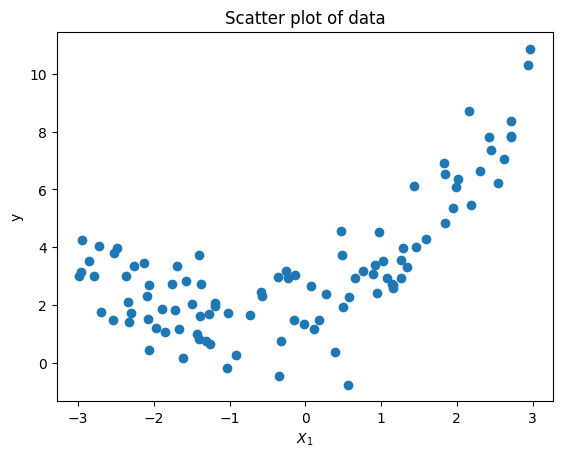

In [19]:
# 데이터셋 시각화
plt.scatter(X, y)
plt.xlabel('$X_1$')
plt.ylabel('y')
plt.title('Scatter plot of data')
plt.show()

In [37]:
# 사이킷런을 사용한 다항 회귀 (PolynomialFeatures를 이용한 각 특성의 변환)
from sklearn.preprocessing import PolynomialFeatures

# 2차 다항식 특성으로 변환 (각 특성을 제곱하여 새로운 특정으로 추가)
poly_features = PolynomialFeatures(degree=2, include_bias=False)    # degree: 차수, include_bias: 상수항 추가 여부
X_poly = poly_features.fit_transform(X)
print(X[0])
print(X_poly[0])

[-2.54133518]
[-2.54133518  6.45838449]


In [38]:
# 확장된 훈련데이터셋에 대한 선형 회귀 적용
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
print(lin_reg.intercept_, lin_reg.coef_)

[1.83408279] [[0.96581558 0.5330214 ]]


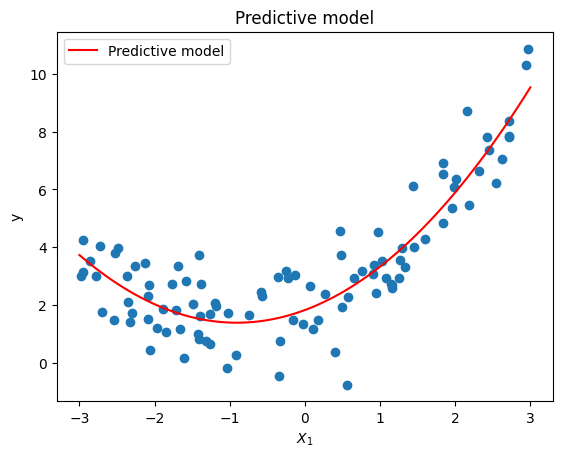

In [53]:
# 예측 모델 시각화
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

plt.scatter(X, y)
plt.plot(X_new, y_new, 'r-', label='Predictive model')
plt.xlabel('$X_1$')
plt.ylabel('y')
plt.title('Predictive model')
plt.legend()
plt.show()

# 학습 곡선

> 모델의 일반화 성능을 추정하기 위한 방법으로 `교차 검증`을 사용할 수 있다.
> - 훈련 데이터에서 성능이 좋지만 교차 검증 점수가 나쁠 경우 모델은 과대적합이 된 것이다.
> - 양쪽 모두 성능이 좋지 않을 경우 과소적합이 된 것으로 볼 수 있다.
> 
> 모델의 일반화 성능을 측정하기 위한 또 다른 방법으로 `학습 곡선`을 살펴보는 방법이 있다.
> - 학습 곡선은 훈련 세트의 크기만큼 점진적으로 훈련 데이터를 늘려가며 모델의 훈련을 반복하고, 각 반복마다 훈련 세트 및 검증 세트에서의 성능을 그래프로 나타낸 것이다.

In [113]:
# 모델의 학습 곡선을 그리는 함수
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), 'r-+', linewidth=2, label='train set')
    plt.plot(np.sqrt(val_errors), 'b-', linewidth=3, label='validation set')
    plt.legend()

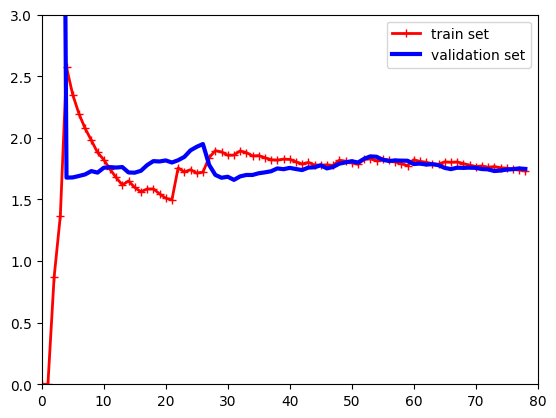

In [114]:
# 단순 선형 회귀 모델의 학습 곡선
lin_reg = LinearRegression()

plt.axis([0, 80, 0, 3])
plot_learning_curves(lin_reg, X, y)

> 훈련 세트의 경우 샘플이 1개 혹은 2개일 때 모델은 오차가 없이 완벽하게 작동한다.
> - 하지만 샘플이 늘어남에 따라 잡음의 영향과 비선형 형태의 특징으로 인해 오차가 점차 커진다.
> - 특정 위치에서는 훈련 세트에 샘플이 추가되어도 평균 오차가 크게 변화하기 않는다.
>
> 검증 세트의 경우 초기에 적은 수의 훈련 샘플로는 제대로 된 일반화를 할 수 없기 때문에 오차가 매우 크게 나타난다.
> - 하지만 훈련 세트가 늘어남에 따라 학습이 이루어지고 검증 오차는 점차 감소한다.
> - 이때 선형 회귀의 직선은 2차식의 형태인 데이터를 잘 모델링할 수 없기 때문에 오차의 감소는 점차 완만해지다가 훈련 세트의 그래프와 가까워진다.
>
> 위의 그래프는 전형적인 `과소적합 모델`의 모습이다.
> - 두 곡선이 수평한 구간을 만들며, 꽤 높은 오차에서 매우 가까이 근접해 있는 형태이다.
> - 모델이 훈련 데이터에 과소적합되어 있을 경우 훈련 샘프을 더 추가해도 효과가 없으며, 더 복잡한 모델을 사용하거나 더 나은 특성을 선택해야 한다.

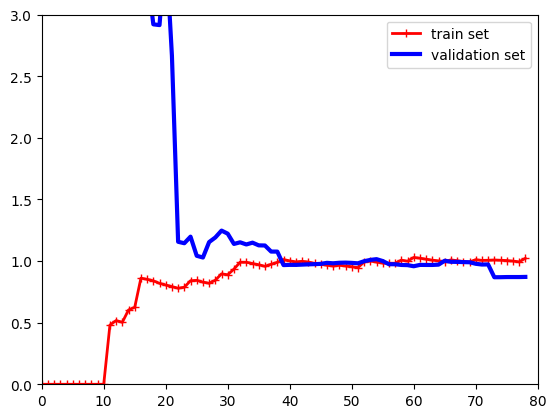

In [115]:
# 10차 다항 회귀 모델의 학습 곡선
from sklearn.pipeline import Pipeline

polynomial_regression_10th = Pipeline([
    ('poly_features', PolynomialFeatures(degree=10, include_bias=False)),
    ('lin_reg', LinearRegression())
])

plt.axis([0, 80, 0, 3])
plot_learning_curves(polynomial_regression_10th, X, y)

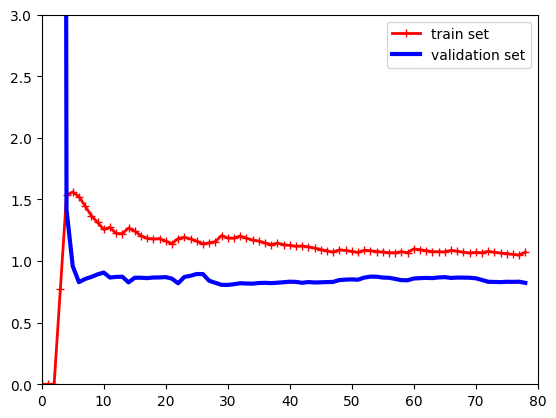

In [116]:
# 2차 다항 회귀 모델의 학습 곡선
from sklearn.pipeline import Pipeline

polynomial_regression_2nd = Pipeline([
    ('poly_features', PolynomialFeatures(degree=2, include_bias=False)),
    ('lin_reg', LinearRegression())
])

plt.axis([0, 80, 0, 3])
plot_learning_curves(polynomial_regression_2nd, X, y)

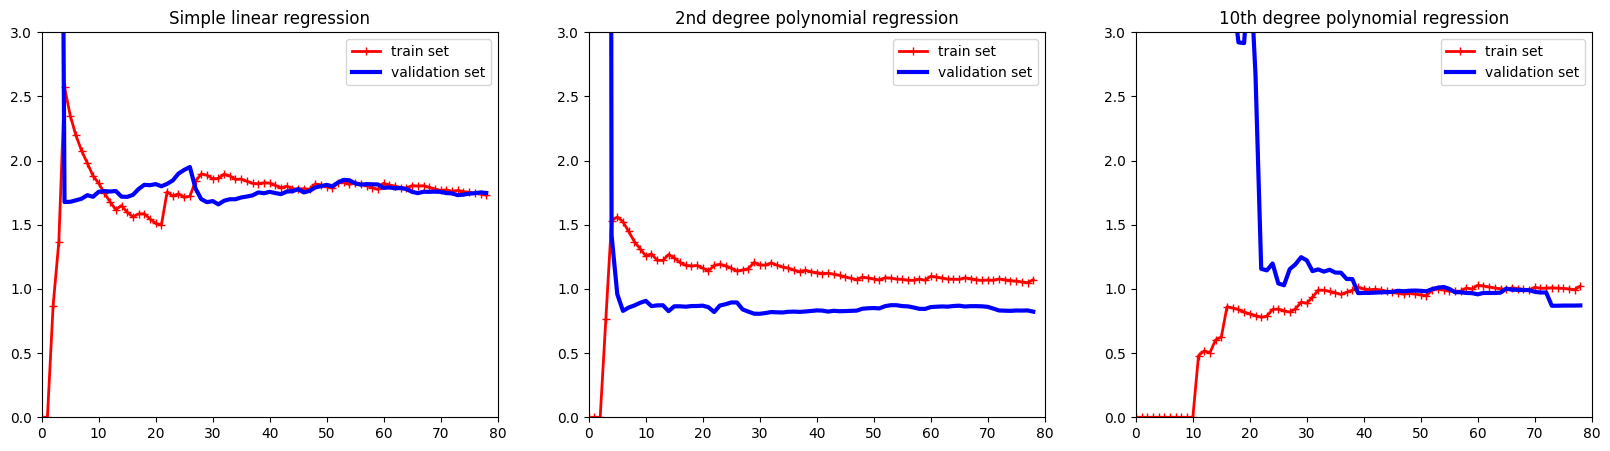

In [118]:
# 각각의 학습 곡선 비교
plt.figure(figsize=(20, 5))

# 단순 선형 회귀 모델
plt.subplot(131)
lin_reg = LinearRegression()
plt.axis([0, 80, 0, 3])
plot_learning_curves(lin_reg, X, y)
plt.title('Simple linear regression')

# 2차 다항 회귀 모델
plt.subplot(132)
plt.axis([0, 80, 0, 3])
plot_learning_curves(polynomial_regression_2nd, X, y)
plt.title('2nd degree polynomial regression')

# 10차 다항 회귀 모델
plt.subplot(133)
plt.axis([0, 80, 0, 3])
plot_learning_curves(polynomial_regression_10th, X, y)
plt.title('10th degree polynomial regression')

plt.show()

# 5. 규제가 있는 선형 모델

# 6. 로지스틱 회귀